In [75]:
import mlrose_hiive as mlrose
import numpy as np
import time

In [109]:
fitness = mlrose.FlipFlop()

## RHC

In [141]:
size = [20,50,100,200]
random_seed = [75 * i for i in range(1,6)]

fitness_dic_rhc = {}
fitness_curve_dic_rhc = {}
time_list_rhc = {}

for s in size:
    
    time_list_rhc[s] = []
    
    print('size: ', s)
    
    
    fitness_list = []
    for seed in random_seed:
        problem = mlrose.DiscreteOpt(length = s, fitness_fn = fitness, maximize = True, max_val = 2)
        
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 2, init_state = None, curve = True, random_state = seed)
        fitness_list.append(best_fitness)
        
        time_list_rhc[s].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        
        fitness_curve_dic_rhc[(s,seed)] = fitness_curve
    fitness_dic_rhc[s] = fitness_list
        
    print('mean_fitness: ', np.mean(fitness_list))
    print('\n')
        

size:  20
mean_fitness:  16.4


size:  50
mean_fitness:  36.2


size:  100
mean_fitness:  66.0


size:  200
mean_fitness:  129.8




## SA

First we test the influence of different decay.

In [142]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50]

exp_decay = [5e-1,5e-2,5e-3,5e-4,5e-5,5e-6,5e-7]
geom_decay = [0.9,0.99,0.999,0.9999,0.99999,0.5]
arith_decay = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

decay = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
match_decay = ['ExpDecay','GeomDecay','ArithDecay']
grid_search_sa = {}


for size in problem_size:
    
    print('size :', size)
    
  
    
    
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
        
        for d in decay_list:
            fitness_list = []
            
            if decay == 'ExpDecay':
                schedule = mlrose.ExpDecay(init_temp=1, exp_const=d)
                
            elif decay == 'GeomDecay':
                schedule = mlrose.GeomDecay(init_temp=1, decay=d)
                
            elif decay == 'ArithDecay':
                schedule = mlrose.ArithDecay(init_temp=1, decay=d)
                
            print('decay :', decay,d)
            
            
            
            for random_state in random_seeds:
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule,  curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
            print('mean_fitness :', np.mean(fitness_list))
            grid_search_sa[(size,decay,d)] = np.sum(fitness_list)
            print('\n')

size : 50
decay : ExpDecay 0.5
mean_fitness : 41.6


decay : ExpDecay 0.05
mean_fitness : 42.0


decay : ExpDecay 0.005
mean_fitness : 42.4


decay : ExpDecay 0.0005
mean_fitness : 39.8


decay : ExpDecay 5e-05
mean_fitness : 38.4


decay : ExpDecay 5e-06
mean_fitness : 39.4


decay : ExpDecay 5e-07
mean_fitness : 39.0


decay : GeomDecay 0.9
mean_fitness : 41.6


decay : GeomDecay 0.99
mean_fitness : 43.4


decay : GeomDecay 0.999
mean_fitness : 42.2


decay : GeomDecay 0.9999
mean_fitness : 40.2


decay : GeomDecay 0.99999
mean_fitness : 38.2


decay : GeomDecay 0.5
mean_fitness : 41.6


decay : ArithDecay 1e-07
mean_fitness : 39.0


decay : ArithDecay 1e-06
mean_fitness : 40.2


decay : ArithDecay 1e-05
mean_fitness : 38.2


decay : ArithDecay 0.0001
mean_fitness : 39.0


decay : ArithDecay 0.001
mean_fitness : 42.6


decay : ArithDecay 0.01
mean_fitness : 43.4




In [136]:
best_state

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

For a size of 50, often the best decays are not the fastest or slowest one, which indicates a trade off between exploration and exploitation. Makes sense for this problem as there are lot of locals maxima. We want to get out of the lcoal maxima, but we still needs to get to them.

Here we do the grid search for the different size

In [169]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [20,50,100,200]

exp_decay = [5e-1,5e-2,5e-3,5e-4,5e-5,5e-6,5e-7]
geom_decay = [0.9,0.99,0.999,0.9999,0.99999,0.5]
arith_decay = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

decay = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
match_decay = ['ExpDecay','GeomDecay','ArithDecay']
grid_search_sa = {}


for size in problem_size:
    
    
    print(size)
 
    
    
    
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
        
        for d in decay_list:
            fitness_list = []
            
            if decay == 'ExpDecay':
                schedule = mlrose.ExpDecay(init_temp=1, exp_const=d)
                
            elif decay == 'GeomDecay':
                schedule = mlrose.GeomDecay(init_temp=1, decay=d)
                
            elif decay == 'ArithDecay':
                schedule = mlrose.ArithDecay(init_temp=1, decay=d)
                
            
            for random_state in random_seeds:
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule,curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                
            grid_search_sa[(size,decay,d)] = np.sum(fitness_list)

20
50
100
200


In [170]:
#for each size, print the argmax of grid search
for size in problem_size:
    val = -np.inf
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
            
        for d in decay_list:
            if grid_search_sa[(size,decay,d)] > val:
                val = grid_search_sa[(size,decay,d)]
                best = (decay,d)
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val/5))

For size 20, the best parameters are ('GeomDecay', 0.99999) with a fitness of 17.6
For size 50, the best parameters are ('GeomDecay', 0.99) with a fitness of 43.4
For size 100, the best parameters are ('ArithDecay', 0.001) with a fitness of 82.8
For size 200, the best parameters are ('ArithDecay', 0.01) with a fitness of 168.2


Below I run SA with the best parameters :

In [159]:
random_seeds = [75 * i for i in range(1, 6)]

size = [20,50,100,200]
schedule_list = [mlrose.GeomDecay(decay = 0.99999),mlrose.GeomDecay(decay = 0.99),mlrose.ArithDecay(decay = 0.001),mlrose.ArithDecay(decay=0.01)]

fitness_dic_sa = {}
fitness_curve_dic_sa = {}
time_list_sa = {}
for s,schedule in zip(size,schedule_list):
    time_list_sa[s] = []
    fitness_list = []
    
   
    
    
    
   
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True, random_state=random_state)
        
        time_list_sa[s].append(time.time() - start_time)
        print('best_fitness :', best_fitness)
        fitness_list.append(best_fitness)
        
        fitness_curve_dic_sa[(s,random_state)] = fitness_curve
    fitness_dic_sa[s] = fitness_list
    print('\n')

best_fitness : 17.0
best_fitness : 19.0
best_fitness : 19.0
best_fitness : 17.0
best_fitness : 16.0


best_fitness : 45.0
best_fitness : 46.0
best_fitness : 42.0
best_fitness : 41.0
best_fitness : 43.0


best_fitness : 85.0
best_fitness : 79.0
best_fitness : 87.0
best_fitness : 79.0
best_fitness : 84.0


best_fitness : 174.0
best_fitness : 169.0
best_fitness : 162.0
best_fitness : 168.0
best_fitness : 168.0




## GA

I first test the influence of the mutation probability parameters.

Smaller mp gives better results : makes sense

In [166]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [100]

mutation_prob = [0.1,0.2,0.3,0.4,0.5]
#pop_breed_percent = [0.25,0.5,0.75]
pbp = 0.75
grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    
   
    
    
    
    
    
    for mp in mutation_prob:
        
        print('mutation_prob :', mp)
        #for pbp in pop_breed_percent:
        fitness_list = []
        iter = []
        
        
        for random_state in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, mutation_prob=mp,pop_breed_percent= pbp, curve=True, random_state=random_state)
            print('best_fitness :', best_fitness)
            fitness_list.append(best_fitness)
            iter.append(len(fitness_curve))
        print('mean iter :', np.mean(iter))
        print('mean_fitness :', np.mean(fitness_list))
        print("\n")
        grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
        grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)

mutation_prob : 0.1
best_fitness : 71.0
best_fitness : 87.0
best_fitness : 90.0
best_fitness : 73.0
best_fitness : 87.0
mean iter : 45.6
mean_fitness : 81.6


mutation_prob : 0.2
best_fitness : 74.0
best_fitness : 88.0
best_fitness : 92.0
best_fitness : 90.0
best_fitness : 68.0
mean iter : 55.4
mean_fitness : 82.4


mutation_prob : 0.3
best_fitness : 75.0
best_fitness : 68.0
best_fitness : 69.0
best_fitness : 77.0
best_fitness : 68.0
mean iter : 23.4
mean_fitness : 71.4


mutation_prob : 0.4
best_fitness : 89.0
best_fitness : 67.0
best_fitness : 70.0
best_fitness : 72.0
best_fitness : 89.0
mean iter : 44.8
mean_fitness : 77.4


mutation_prob : 0.5
best_fitness : 78.0
best_fitness : 90.0
best_fitness : 74.0
best_fitness : 88.0
best_fitness : 70.0
mean iter : 44.0
mean_fitness : 80.0




Influence of pop breed percent : Better results with more breeding : problem is good for crossover.

In [167]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [100]

#mutation_prob = [0.1,0.2,0.3,0.4,0.5]
pop_breed_percent = [0.25,0.5,0.75]
mp = 0.2
grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    

    
    
    
    
    for pbp in pop_breed_percent:
        
        print('pop_breed_percent :', pbp)
        #for pbp in pop_breed_percent:
        fitness_list = []
        iter = []
        fevals = []
       
        
        for random_state in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200,mutation_prob=mp,pop_breed_percent= pbp,  curve=True, random_state=random_state)
            print('best_fitness :', best_fitness)
            fitness_list.append(best_fitness)
            iter.append(len(fitness_curve))
            fevals.append(fitness_curve[-1,1])
        print('mean fevals :', np.mean(fevals))
        print('mean iter :', np.mean(iter))
        print('mean fitness :', np.mean(fitness_list))
        print("\n")
        grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
        grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)

pop_breed_percent : 0.25
best_fitness : 67.0
best_fitness : 67.0
best_fitness : 72.0
best_fitness : 70.0
best_fitness : 72.0
mean fevals : 6275.6
mean iter : 30.2
mean fitness : 69.6


pop_breed_percent : 0.5
best_fitness : 71.0
best_fitness : 91.0
best_fitness : 76.0
best_fitness : 68.0
best_fitness : 76.0
mean fevals : 8288.2
mean iter : 40.2
mean fitness : 76.4


pop_breed_percent : 0.75
best_fitness : 74.0
best_fitness : 88.0
best_fitness : 92.0
best_fitness : 90.0
best_fitness : 68.0
mean fevals : 11347.0
mean iter : 55.4
mean fitness : 82.4




I run GA with the best parameters

In [171]:
random_seeds = [75 * i for i in range(1, 6)]

size = [20,50,100,200]

fitness_dic_ga = {}
fitness_curve_dic_ga = {}
time_list_ga = {}
for s in size:
    time_list_ga[s] = []
    fitness_list = []
    
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, mutation_prob= 0.1,  curve=True, random_state=random_state)
        
        time_list_ga[s].append(time.time() - start_time)
        
        fitness_list.append(best_fitness)
        print('best_fitness :', best_fitness)
        
        fitness_dic_ga[s] = fitness_list
        fitness_curve_dic_ga[(s,random_state)] = fitness_curve
    print('\n')

best_fitness : 19.0
best_fitness : 18.0
best_fitness : 19.0
best_fitness : 17.0
best_fitness : 19.0


best_fitness : 43.0
best_fitness : 47.0
best_fitness : 44.0
best_fitness : 42.0
best_fitness : 44.0


best_fitness : 71.0
best_fitness : 87.0
best_fitness : 90.0
best_fitness : 73.0
best_fitness : 87.0


best_fitness : 133.0
best_fitness : 128.0
best_fitness : 129.0
best_fitness : 127.0
best_fitness : 134.0




## MIMIC

In [179]:
size = [20,50,100,200]
random_seed = [75 * i for i in range(1,6)]
for s in size:
    
    print('size: ', s)
    
   
   
    fitness_list = []
    for seed in random_seed:
        problem = mlrose.DiscreteOpt(length = s, fitness_fn = fitness, maximize = True, max_val = 2)
        problem.set_mimic_fast_mode(True)
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, curve=True, random_state=seed,max_attempts= 30)
        fitness_list.append(best_fitness)
    print('mean_fitness: ', np.mean(best_fitness))
    print('\n')

size:  20
mean_fitness:  19.0


size:  50
mean_fitness:  43.0


size:  100
mean_fitness:  88.0


size:  200
mean_fitness:  160.0




In [174]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [20,50,100,200]

keep_percent = [0.1,0.2,0.3]
pop_size = [50,100,200,250]

grid_search_mimic = {}
grid_search_mimic_iter = {}


for size in problem_size:
    print(size)
    for kp in keep_percent:
        for pop_s in pop_size:
            fitness_list = []
            iter = []
            
            for random_state in random_seeds:
                
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                problem.set_mimic_fast_mode(True)
                
                best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=kp,pop_size= pop_s, curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                iter.append(len(fitness_curve))
            grid_search_mimic[(size,kp,pop_s)] = np.sum(fitness_list)
            grid_search_mimic_iter[(size,kp,pop_s)] = np.mean(iter)

20
50
100
200


In [176]:
for size in problem_size:
    val = -np.inf
    for kp in keep_percent:
        for pop_s in pop_size:
            if grid_search_mimic[(size,kp,pop_s)] > val:
                val = grid_search_mimic[(size,kp,pop_s)]
                best = (kp,pop_s)
            
        
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val/5))

For size 20, the best parameters are (0.3, 200) with a fitness of 19.0
For size 50, the best parameters are (0.3, 250) with a fitness of 47.0
For size 100, the best parameters are (0.3, 250) with a fitness of 89.0
For size 200, the best parameters are (0.3, 250) with a fitness of 171.6


Run Mimic with best parameters

In [178]:
random_seeds = [75 * i for i in range(1, 6)]

problem_size = [20,50,100,200]

fitness_dic_mimic = {}
fitness_curve_dic_mimic = {}
time_list_mimic = {}


for size in problem_size:
    time_list_mimic[size] = []
    fitness_list = []
    
   
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness,maximize=True, max_val=2)
        problem.set_mimic_fast_mode(True)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, curve=True, random_state=random_state,pop_size=200 if size == 20 else 250, keep_pct=0.3)
        
        time_list_mimic[size].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        print('best_fitness :', best_fitness)
        fitness_dic_mimic[size] = fitness_list
        fitness_curve_dic_mimic[(size,random_state)] = fitness_curve
    print('\n')
        

best_fitness : 19.0
best_fitness : 19.0
best_fitness : 19.0
best_fitness : 19.0
best_fitness : 19.0


best_fitness : 47.0
best_fitness : 45.0
best_fitness : 49.0
best_fitness : 46.0
best_fitness : 48.0


best_fitness : 88.0
best_fitness : 89.0
best_fitness : 91.0
best_fitness : 89.0
best_fitness : 88.0


best_fitness : 171.0
best_fitness : 172.0
best_fitness : 174.0
best_fitness : 171.0
best_fitness : 170.0




In [180]:
import matplotlib.pyplot as plt

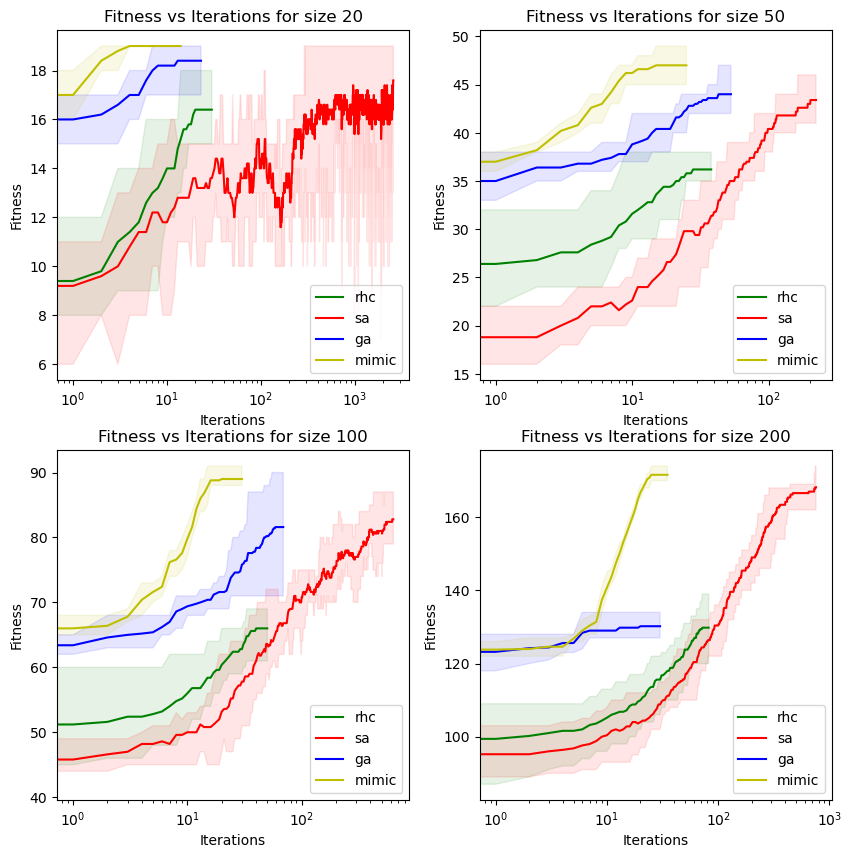

In [183]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for size,_ in zip([20,50,100,200],[(0,0),(0,1),(1,0),(1,1)]):
    mean_fitness_rhc = []
    max_fitness_rhc = []
    min_fitness_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_rhc_min,l_rhc_max):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5-1][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
        
    mean_fitness_sa = []
    max_fitness_sa = []
    min_fitness_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0]
        

        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0] if i < length1 else fitness_curve_dic_sa[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0] if i < length2 else fitness_curve_dic_sa[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0] if i < length3 else fitness_curve_dic_sa[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0] if i < length4 else fitness_curve_dic_sa[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0] if i < length5 else fitness_curve_dic_sa[(size,375)][length5-1][0]
        
        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_ga = []
    max_fitness_ga = []
    min_fitness_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0]
        

        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
    
    for i in range(l_ga_min,l_ga_max):
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0] if i < length1 else fitness_curve_dic_ga[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0] if i < length2 else fitness_curve_dic_ga[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0] if i < length3 else fitness_curve_dic_ga[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0] if i < length4 else fitness_curve_dic_ga[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0] if i < length5 else fitness_curve_dic_ga[(size,375)][length5-1][0]
        
        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_mimic = []
    max_fitness_mimic = []
    min_fitness_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0]
        

        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5-1][0]
        
        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    ax[_].fill_between(range(l_rhc_max), min_fitness_rhc, max_fitness_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fitness_rhc,color='g',label='rhc')

    ax[_].fill_between(range(l_sa_max), min_fitness_sa, max_fitness_sa, alpha=0.1, color="r")
    ax[_].plot(mean_fitness_sa,color='r',label='sa')


    ax[_].fill_between(range(l_ga_max), min_fitness_ga, max_fitness_ga, alpha=0.1, color="b")
    ax[_].plot(mean_fitness_ga,color='b',label='ga')

    ax[_].fill_between(range(l_mimic_max), min_fitness_mimic, max_fitness_mimic, alpha=0.1, color="y")
    ax[_].plot(mean_fitness_mimic,color='y',label='mimic')

    ax[_].legend(loc='lower right')
    ax[_].set_xlabel('Iterations')
    #log x axis
    ax[_].set_xscale('log')
    ax[_].set_ylabel('Fitness')
    ax[_].set_title('Fitness vs Iterations for size {}'.format(size))
    #write max fitness and max local fitness
    

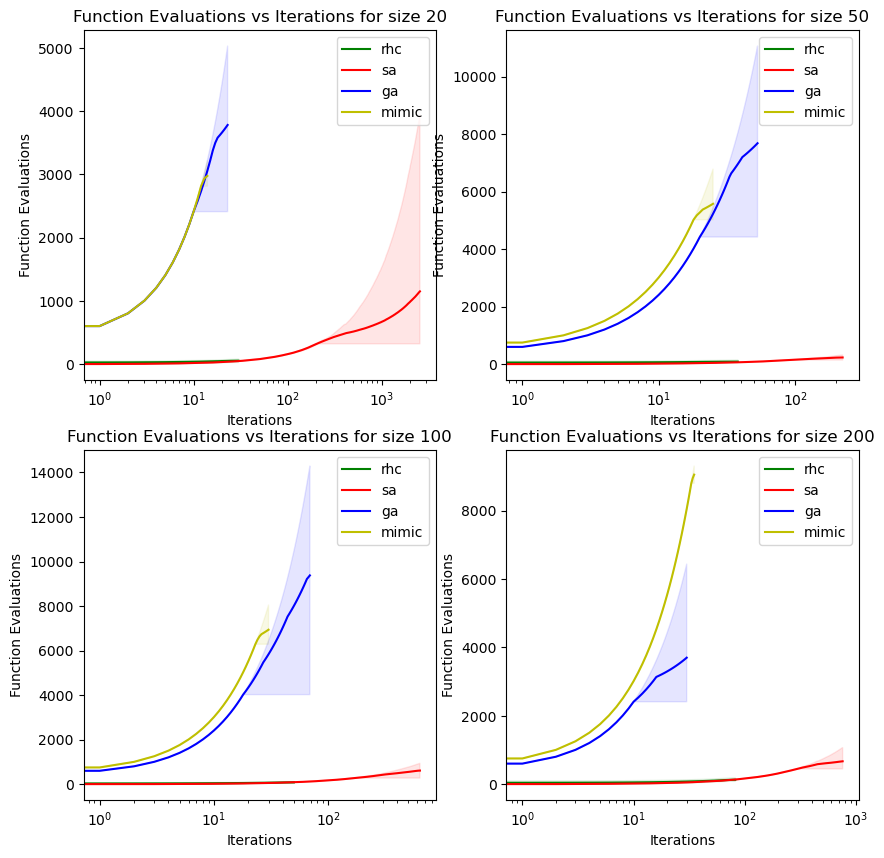

In [186]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for size,_ in zip([20,50,100,200],[(0,0),(0,1),(1,0),(1,1)]):
    
    mean_fevals_rhc = []
    max_fevals_rhc = []
    min_fevals_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))

    for i in range(l_rhc_min,l_rhc_max):
        
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5 - 1][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fevals_sa = []
    max_fevals_sa = []
    min_fevals_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1]
        

        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1] if i < length1 else fitness_curve_dic_sa[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1] if i < length2 else fitness_curve_dic_sa[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1] if i < length3 else fitness_curve_dic_sa[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1] if i < length4 else fitness_curve_dic_sa[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1] if i < length5 else fitness_curve_dic_sa[(size,375)][length5 - 1][1]
        
        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))    
        
        
    mean_fevals_ga = []
    max_fevals_ga = []
    min_fevals_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1]
        

        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_ga_min,l_ga_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1] if i < length1 else fitness_curve_dic_ga[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1] if i < length2 else fitness_curve_dic_ga[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1] if i < length3 else fitness_curve_dic_ga[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1] if i < length4 else fitness_curve_dic_ga[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1] if i < length5 else fitness_curve_dic_ga[(size,375)][length5 - 1][1]
        
        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    mean_fevals_mimic = []
    max_fevals_mimic = []
    min_fevals_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1]
        

        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5 - 1][1]
        
        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    ax[_].fill_between(range(l_rhc_max), min_fevals_rhc, max_fevals_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fevals_rhc,color='g',label='rhc')
    
    ax[_].fill_between(range(l_sa_max), min_fevals_sa, max_fevals_sa, alpha=0.1, color="r",)
    ax[_].plot(mean_fevals_sa,color='r',label='sa')
    
    ax[_].fill_between(range(l_ga_max), min_fevals_ga, max_fevals_ga, alpha=0.1, color="b",)
    ax[_].plot(mean_fevals_ga,color='b',label='ga')
    
    ax[_].fill_between(range(l_mimic_max), min_fevals_mimic, max_fevals_mimic, alpha=0.1, color="y",)
    ax[_].plot(mean_fevals_mimic,color='y',label='mimic')
    
    ax[_].legend(loc='best')
    ax[_].set_xlabel('Iterations')
    ax[_].set_ylabel('Function Evaluations')
    ax[_].set_title('Function Evaluations vs Iterations for size {}'.format(size))
    #log scale y axis
    ax[_].set_xscale('log')
    
plt.show()

In [188]:
for s in [20,50,100,200]:
    print('size : ',s,'\n')
    print('RHC mean time :',np.mean(time_list_rhc[s]))
    print('SA mean time :',np.mean(time_list_sa[s]))
    print('GA mean time :',np.mean(time_list_ga[s]))
    print('MIMIC mean time :',np.mean(time_list_mimic[s]))
    print('\n')

size :  20 

RHC mean time : 0.001047801971435547
SA mean time : 0.011417150497436523
GA mean time : 0.06932406425476074
MIMIC mean time : 0.045382022857666016


size :  50 

RHC mean time : 0.0018087863922119141
SA mean time : 0.003333568572998047
GA mean time : 0.1751321792602539
MIMIC mean time : 0.2298415184020996


size :  100 

RHC mean time : 0.0029813289642333985
SA mean time : 0.013674116134643555
GA mean time : 0.2806607723236084
MIMIC mean time : 0.7941646099090576


size :  200 

RHC mean time : 0.007647991180419922
SA mean time : 0.025361919403076173
GA mean time : 0.16470689773559571
MIMIC mean time : 3.1154066562652587


